In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
data = pd.read_csv('./Data/zpcd8615.dat', '\t', header=None)

In [4]:
## There are 3 spaces between the first and second terms in the .dat file so I decide to split the data on 3 spaces
data = data[0].str.split('   ')

In [5]:
data = pd.DataFrame(item for item in data)

In [6]:
data.columns = ['X1', 'X2']

In [7]:
data.drop('X2', axis=1, inplace=True)

In [8]:
data['sex'] = data.X1.str[0]
data['years'] = data.X1.str[1]
data['zip'] = data.X1.str[2:7]
data['age'] = data.X1.str[10]
data['type'] = data.X1.str[8:10]
#data['stage'] = data.X1.str[7]

In [9]:
data.drop('X1', axis=1, inplace=True)

In [10]:
sexcode = {'1':'male', '2':'female'}
diagnosisyear = {'1':'1986-1990', '2':'1991-1995', '3':'1996-2000',
                 '4':'2001-2005', '5':'2006-2010', '6':'2011-2015'}
agegroup = {'1':'0-14', '2':'15-44', '3':'45-64', '4':'65+'}
cancertype = {' 1':'oral cavity and pharynx', ' 2':'colorectal', ' 3':'lung and bronchus',
              ' 4':'breast invasive-female', ' 5':'cervix', ' 6':'prostate',
              ' 7':'urinary system', ' 8':'central nervous system', ' 9':'lukemias and lymphomas',
              '10':'all other cancers', '11':'breast in-situ-female'}

In [11]:
data['sex'].replace(sexcode, inplace=True)
data['years'].replace(diagnosisyear, inplace=True)
data['age'].replace(agegroup, inplace=True)
data['type'].replace(cancertype, inplace=True)

In [12]:
data.head(10)

,sex,years,zip,age,type
0,female,2011-2015,60938,65+,breast invasive-female
1,female,1996-2000,61938,65+,all other cancers
2,female,1991-1995,61944,45-64,breast invasive-female
3,female,2001-2005,61944,65+,all other cancers
4,female,1991-1995,62959,45-64,lung and bronchus
5,male,2001-2005,61761,65+,colorectal
6,female,1996-2000,61821,65+,colorectal
7,female,1996-2000,61821,65+,all other cancers
8,female,1996-2000,61880,65+,colorectal
9,female,2001-2005,61880,65+,breast invasive-female


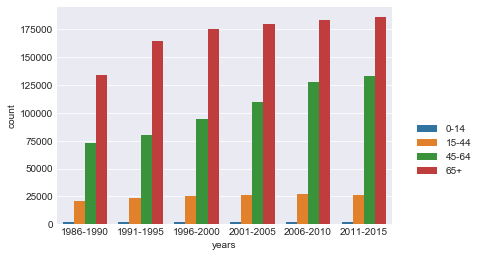

In [13]:
sns.countplot(x='years', hue='age', hue_order= ['0-14', '15-44', '45-64', '65+'],
              data=data.sort_values(by='years'))
plt.legend(bbox_to_anchor=(1.05, .5), loc=2)

In [14]:
data['years'].value_counts()

2011-2015    347560
2006-2010    339403
2001-2005    317779
1996-2000    297033
1991-1995    269930
1986-1990    229740
Name: years, dtype: int64

In [15]:
data['sex'].value_counts()

female    918198
male      883247
Name: sex, dtype: int64

In [16]:
data['age'].value_counts()

65+      1022269
45-64     617442
15-44     150138
0-14       11596
Name: age, dtype: int64

In [17]:
data['type'].value_counts()

all other cancers          457634
breast invasive-female     257344
lung and bronchus          256801
prostate                   233736
colorectal                 201997
urinary system             132428
lukemias and lymphomas     126087
breast in-situ-female       50837
oral cavity and pharynx     41469
central nervous system      23767
cervix                      19345
Name: type, dtype: int64

In [18]:
since2000 = ['2001-2005', '2006-2010', '2011-2015']

In [19]:
datasub = data[(data['years'].isin(since2000))]

In [20]:
datasub['age'].value_counts()

65+      548577
45-64    369945
15-44     80085
0-14       6135
Name: age, dtype: int64

In [21]:
zipcodes = ['60527', '60439', '60561', '60521', '60558', '60514', '60559', '60525']

In [22]:
datalocal = data[data['zip'].isin(zipcodes)]

In [23]:
datalocal['zip'].value_counts()

60525    6102
60527    3938
60561    3798
60559    3355
60439    3160
60521    2997
60558    2275
60514    1909
Name: zip, dtype: int64

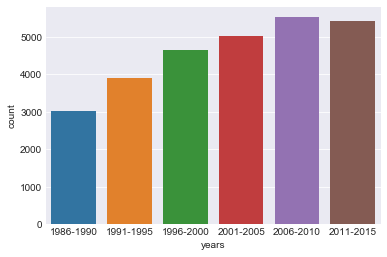

In [24]:
sns.countplot(x='years', data=datalocal.sort_values(by='years'))

In [25]:
datalocal['age'].value_counts()

65+      15528
45-64     9676
15-44     2183
0-14       147
Name: age, dtype: int64

In [26]:
datalocalsub = datasub[datasub['zip'].isin(zipcodes)]

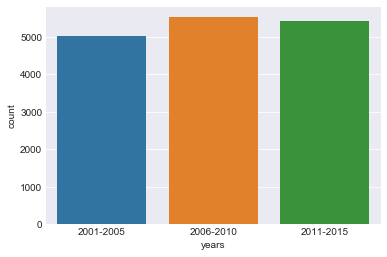

In [27]:
sns.countplot(x='years', data=datalocalsub.sort_values(by='years'))

In [28]:
datalocalsub['age'].value_counts()

65+      8926
45-64    5837
15-44    1140
0-14       73
Name: age, dtype: int64

In [29]:
datasub['age'].value_counts()

65+      548577
45-64    369945
15-44     80085
0-14       6135
Name: age, dtype: int64

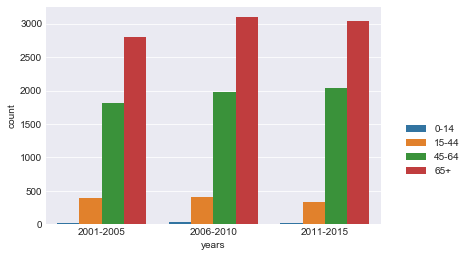

In [30]:
sns.countplot(x='years', hue='age', data=datalocalsub.sort_values(by=['years', 'age']))
plt.legend(bbox_to_anchor=(1.05, .5), loc=2)

In [31]:
pop_illinois = 12830632
num_cases = datasub.shape[0]
num_cases_per_year = num_cases/15
one_in_every_il = pop_illinois/num_cases_per_year
per_100000_il_per_year = num_cases_per_year * 100000 / pop_illinois

In [32]:
one_in_every_il

191.55114447290944

In [33]:
ilpop = pd.read_csv('./Data/il_2010_populations.csv', skiprows=1)
ilpop.drop(labels=['Id', 'Geography'], axis=1, inplace=True)
ilpop.rename(index=str, columns={'Id2':'zip', 'Total':'population'}, inplace=True)

In [34]:
cancer_counts = datasub['zip'].value_counts()
ilcancer = cancer_counts.rename_axis('zip').reset_index(name='freq')
ilcancer['zip'] = pd.to_numeric(ilcancer['zip'])

In [43]:
cancer = pd.merge(ilpop, ilcancer, 'left')
cancer['per year'] = cancer['freq']/15
cancer['one in every X per year'] = cancer['population']/cancer['per year']
cancer['per 100000 per year'] = cancer['per year']*100000/cancer['population']
cancer['zip vs state'] = cancer['per 100000 per year']/per_100000_il_per_year
cancer.head(6)

,zip,population,freq,per year,one in every X per year,per 100000 per year,zip vs state
0,60002,24299,1978.0,131.866667,184.269464,542.683512,1.039516
1,60004,50582,4530.0,302.000000,167.490066,597.050334,1.143657
2,60005,29308,2790.0,186.000000,157.569892,634.639006,1.215658
3,60007,33820,3155.0,210.333333,160.792393,621.919968,1.191295
4,60008,22717,1723.0,114.866667,197.768427,505.641883,0.968563
5,60010,44095,4109.0,273.933333,160.969822,621.234456,1.189982


In [44]:
cancer_local = cancer[cancer['zip'].isin(zipcodes)].sort_values('zip vs state', ascending=False)
cancer_local

,zip,population,freq,per year,one in every X per year,per 100000 per year,zip vs state
239,60525,31168,3389.0,225.933333,137.952198,724.888775,1.388533
270,60561,23115,2341.0,156.066667,148.109782,675.174850,1.293305
241,60527,27486,2720.0,181.333333,151.577206,659.729802,1.263720
267,60558,12960,1214.0,80.933333,160.131796,624.485597,1.196209
173,60439,22919,2049.0,136.600000,167.781845,596.012042,1.141668
237,60521,17597,1529.0,101.933333,172.632440,579.265405,1.109590
230,60514,9708,817.0,54.466667,178.237454,561.049306,1.074696
268,60559,24852,1917.0,127.800000,194.460094,514.244326,0.985041


Text(7.5,512.054,'522.05')

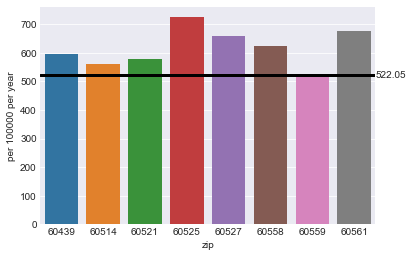

In [42]:
sns.barplot(x='zip', y='per 100000 per year', data=cancer_local)
plt.axhline(y=per_100000_il_per_year, color='black', linewidth=3)
plt.text(7.5, per_100000_il_per_year-10, round(per_100000_il_per_year, 2))

In [38]:
local_counts = datalocalsub.groupby(['years', 'zip'])
local_counts = local_counts.size().reset_index()
local_counts.rename(index = str, columns= {0:'n'}, inplace=True)

In [39]:
illinois_counts = datasub.groupby('years')
illinois_counts = illinois_counts.size().reset_index()
illinois_counts['zip'] = ['Illinois', 'Illinois', 'Illinois']
illinois_counts.rename(index=str, columns={0:'n'}, inplace=True)
illinois_counts = illinois_counts[['years', 'zip', 'n']]

In [40]:
counts = local_counts.append(illinois_counts)
counts

,years,zip,n
0,2001-2005,60439,589
1,2001-2005,60514,282
2,2001-2005,60521,522
3,2001-2005,60525,1102
4,2001-2005,60527,849
5,2001-2005,60558,375
6,2001-2005,60559,606
7,2001-2005,60561,705
8,2006-2010,60439,746
9,2006-2010,60514,275


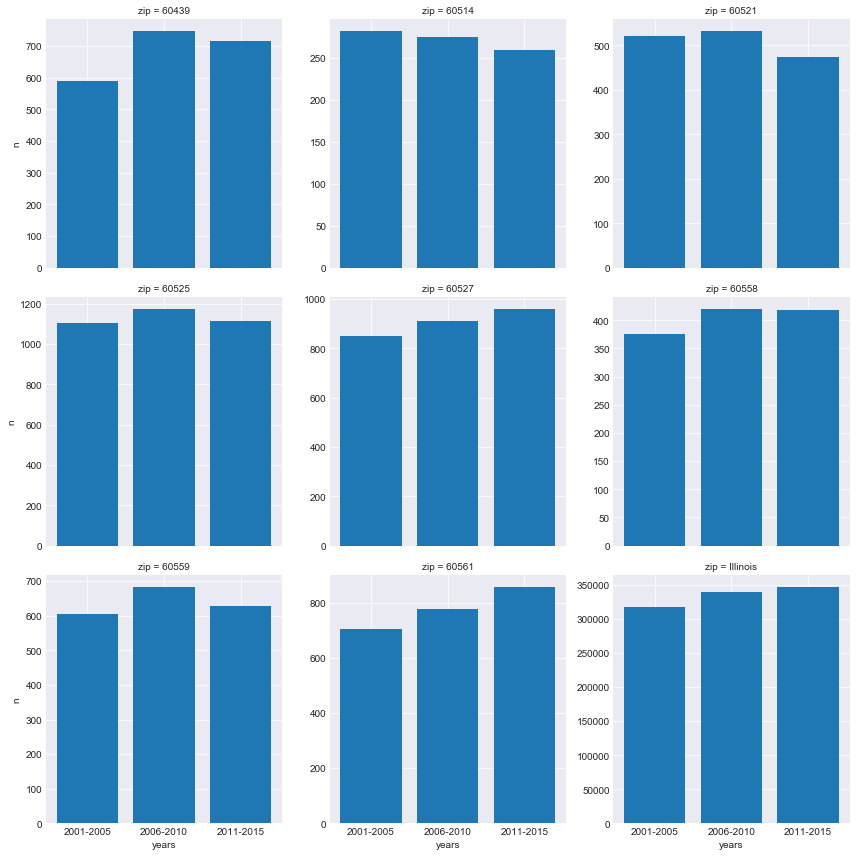

In [41]:
g = sns.FacetGrid(counts, col='zip', col_wrap = 3, size=4, sharey = False)
g = g.map(plt.bar, 'years', 'n')